# Alpha diversity timelines for skin & stool microbiome

In [1]:
# load the libraries
library(tidyverse)
library(cowplot)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

-- Attaching packages ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.3.5       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  

-- Conflicts ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'cowplot' was built under R version 3.6.3"


## Skin microbiome

In [2]:
#load metadata
#metadata <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/inputs/metadata_swabs_cut.tsv")
metadata <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\swabs_ZS\\inputs\\metadata_swabs_cut.tsv")

# load alpha diversities
#shannon <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/outputs/qiime2_results_290230/diversity-D_UST/alpha/shannon_tabulated.tsv", sep='\t')[-1, ]
#faith <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/outputs/qiime2_results_290230/diversity-D_UST/alpha/faith_pd_tabulated.tsv", sep='\t')[-1, ]
#asv <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/outputs/qiime2_results_290230/diversity-D_UST/alpha/observed_features_tabulated.tsv", sep='\t')[-1, ]
#chao1 <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/outputs/qiime2_results_290230/diversity-D_UST/alpha/chao1_tabulated.tsv", sep='\t')[-1, ]
shannon <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\swabs_ZS\\outputs\\qiime2_results_290230\\diversity-D_UST\\alpha\\shannon_tabulated.tsv", sep='\t')[-1, ]
faith <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\swabs_ZS\\outputs\\qiime2_results_290230\\diversity-D_UST\\alpha\\faith_pd_tabulated.tsv", sep='\t')[-1, ]
asv <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\swabs_ZS\\outputs\\qiime2_results_290230\\diversity-D_UST\\alpha\\observed_features_tabulated.tsv", sep='\t')[-1, ]
chao1 <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\swabs_ZS\\outputs\\qiime2_results_290230\\diversity-D_UST\\alpha\\chao1_tabulated.tsv", sep='\t')[-1, ]


# merge alpha diversity with metadata
metadata <- merge(metadata,shannon, by = c("SampleID"))
metadata <- merge(metadata,chao1, by = c("SampleID"))
metadata <- merge(metadata,asv, by = c("SampleID"))
metadata <- merge(metadata,faith, by = c("SampleID"))

# convert data type to double
metadata <- transform(metadata, HBI_pMayo=as.numeric(HBI_pMayo))
metadata <- transform(metadata, shannon_entropy=as.double(shannon_entropy))
metadata <- transform(metadata, observed_features=as.double(observed_features))
metadata <- transform(metadata, chao1=as.double(chao1))
metadata <- transform(metadata, faith_pd=as.double(faith_pd))

head(metadata)

SampleID,Label,Plate,Position,BarcodeSequence,LinkerPrimerSequence,ForwardBarcodeSequence,ReversePrimerSequence,ReverseBarcodeSequence,TruSeqAdapter,...,Patient_Visit_SAE_Eco,Dg_RS3,Dg_Drug_RS3,Dg_SAE_RS3,Dg_SS_SAE_RS3,Dg_SSEco_SAE_RS3,shannon_entropy,chao1,observed_features,faith_pd
K11_JV87_I_D,K11_JV87_I_D,plate_4,G4,ACGAAACGCTCCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,ACGCTCC,GTGAAA,...,HC11_visit_1HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,15,37,27,18
K11_JV87_IV_D,K11_JV87_IV_D,plate_4,H4,ACGAAAGCGCCCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,AGCGCCC,GTGAAA,...,HC11_visit_4HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,20,12,56,49
K12_KJ78_I_D,K12_KJ78_I_D,plate_4,C5,ACGAAAACCCGCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,AACCCGC,GTGAAA,...,HC12_visit_1HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,40,22,12,68
K12_KJ78_IV_D,K12_KJ78_IV_D,plate_4,D5,ACGAAATCCCTCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,ATCCCTC,GTGAAA,...,HC12_visit_4HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,48,18,8,53
K16_PP75_I_D,K16_PP75_I_D,plate_4,F5,ACGAAAGGCCTCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,AGGCCTC,GTGAAA,...,HC16_visit_1HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,36,17,1,50
K16_PP75_IV_D,K16_PP75_IV_D,plate_4,H5,AAAGAGCACGAAA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,AAAGAGC,GTGAAA,...,HC16_visit_4HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,44,62,45,61


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



png 
  2

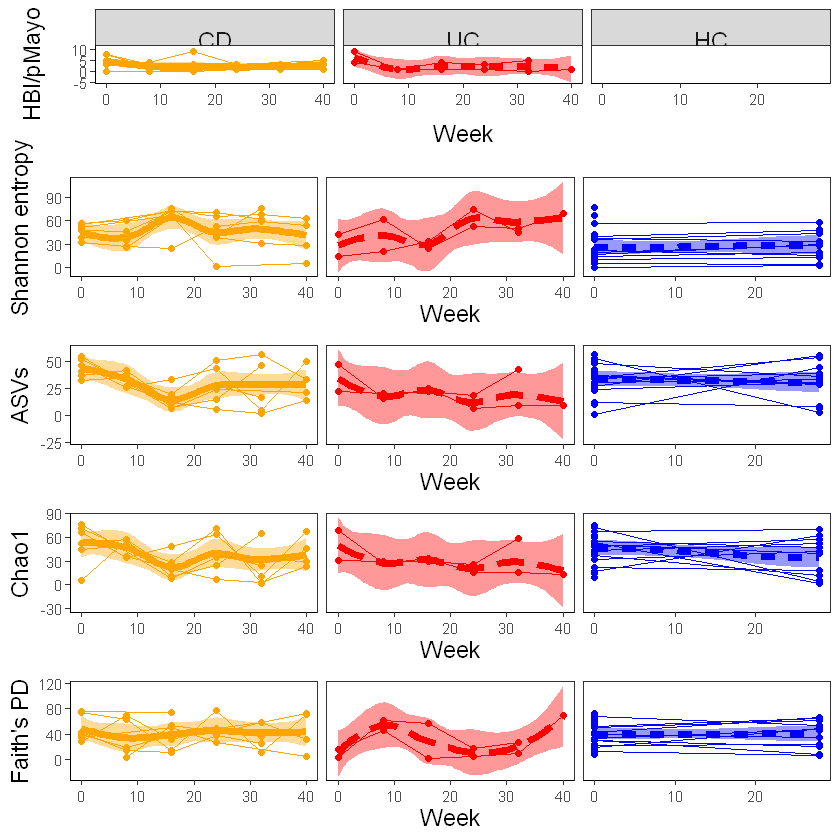

In [3]:
# plot clinical indices
plt_score <- ggplot(data=metadata)+
  geom_point(mapping = aes(x = Week_num, y = HBI_pMayo, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = HBI_pMayo, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = HBI_pMayo, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="HBI/pMayo")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none",
        axis.line = element_line(colour = "black"), 
        axis.title = element_text(size = 14),
        strip.text.x = element_text(size = 14))+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# plot Shannon diversity in time
plt_shannon <- ggplot(data=metadata)+
  geom_point(mapping = aes(x = Week_num, y = shannon_entropy, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = shannon_entropy, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = shannon_entropy, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="Shannon entropy")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none",
        axis.line = element_line(colour = "black"), 
        axis.title = element_text(size = 14),
        strip.text.x = element_blank())+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# plot ASVs in time
plt_asv <- ggplot(data=metadata)+
  geom_point(mapping = aes(x = Week_num, y = observed_features, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = observed_features, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = observed_features, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="ASVs")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none",
        axis.line = element_line(colour = "black"),  
        axis.title = element_text(size = 14),
        strip.text.x = element_blank())+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# plot Chao1 in time
plt_chao1 <- ggplot(data=metadata)+
  geom_point(mapping = aes(x = Week_num, y = chao1, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = chao1, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = chao1, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="Chao1")+
  theme_bw()+
  theme(panel.grid = element_blank(), 
        axis.line = element_line(colour = "black"), legend.position="none",
        axis.title = element_text(size = 14),
        strip.text.x = element_blank())+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# plot Faith's PD in time
plt_faith <- ggplot(data=metadata)+
  geom_point(mapping = aes(x = Week_num, y = faith_pd, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = faith_pd, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = faith_pd, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="Faith's PD")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none",
        axis.line = element_line(colour = "black"),
        axis.title = element_text(size = 14),
        strip.text.x = element_blank())+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# combine plots to one figure
options(warn=-1)
skin_timelines <- plot_grid(plt_score, plt_shannon, plt_asv, plt_chao1, plt_faith, cols=1, align = "v")
skin_timelines
options(warn=0)

# save figure
#png(file = "/Users/dagmarschierova/MEGA/MBÚ/USTEK/Figures/USTEK_skin_alpha_timelines.png", bg = "transparent", res=300, width=5000, height=3000)
png(file = "C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\USTEK\\Figures\\USTEK_skin_alpha_timelines.png", bg = "transparent", res=300, width=4500, height=3000)
plot(skin_timelines)
dev.off()

## Stool microbiome - bacteria

In [4]:
# load metadata
#metadata_stool <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/USTEK/NGS/input/metadata_ustek_new.tsv", sep='\t')[-1, ]
metadata_stool <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\USTEK\\NGS\\input\\metadata_ustek_new.tsv", sep='\t')[-1, ]

# load alpha diveristies
#shannon_stool <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/USTEK/NGS/output/qiime2_results_B_plus_HC/diversity_ustek2/alpha/shannon-tabulated-exported.tsv", sep='\t')[-1, ]
#faith_stool <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/USTEK/NGS/output/qiime2_results_B_plus_HC/diversity_ustek2/alpha/faith_pd-tabulated-exported.tsv", sep='\t')[-1, ]
#asv_stool <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/USTEK/NGS/output/qiime2_results_B_plus_HC/diversity_ustek2/alpha/observed_features-tabulated-exported.tsv", sep='\t')[-1, ]
#chao1_stool <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/USTEK/NGS/output/qiime2_results_B_plus_HC/diversity_ustek2/alpha/chao1-tabulated-exported.tsv", sep='\t')[-1, ]
shannon_stool <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\USTEK\\NGS\\output\\qiime2_results_B_plus_HC\\diversity_ustek2\\alpha\\shannon-tabulated-exported.tsv", sep='\t')[-1, ]
faith_stool <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\USTEK\\NGS\\output\\qiime2_results_B_plus_HC\\diversity_ustek2\\alpha\\faith_pd-tabulated-exported.tsv", sep='\t')[-1, ]
asv_stool <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\USTEK\\NGS\\output\\qiime2_results_B_plus_HC\\diversity_ustek2\\alpha\\observed_features-tabulated-exported.tsv", sep='\t')[-1, ]
chao1_stool <- read.delim("C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\USTEK\\NGS\\output\\qiime2_results_B_plus_HC\\diversity_ustek2\\alpha\\chao1-tabulated-exported.tsv", sep='\t')[-1, ]


# merge alpha diversities with metadata
metadata_stool <- merge(metadata_stool,shannon_stool, by = c("Label"))
metadata_stool <- merge(metadata_stool,chao1_stool, by = c("Label"))
metadata_stool <- merge(metadata_stool,asv_stool, by = c("Label"))
metadata_stool <- merge(metadata_stool,faith_stool, by = c("Label"))


# convert data type to double
metadata_stool <- transform(metadata_stool, HBI_pMayo=as.numeric(as.character(HBI_pMayo)))
metadata_stool <- transform(metadata_stool, shannon_entropy=as.double(shannon_entropy))
metadata_stool <- transform(metadata_stool, observed_features=as.double(observed_features))
metadata_stool <- transform(metadata_stool, chao1=as.double(chao1))
metadata_stool <- transform(metadata_stool, faith_pd=as.double(faith_pd))
metadata_stool <- transform(metadata_stool, Week_num=as.numeric(Week_num))

# filter out controls with one sample
metadata_stool <- filter(metadata_stool, Drug=='UST' | Label=="K2_1" | Label=="K2_4" |
                         Label=="K10_1" | Label=="K10_4" | Label=="K15_1" | Label=="K15_4" |
                         Label=="K31_1" | Label=="K31_4")


Warning message in merge.data.frame(metadata_stool, faith_stool, by = c("Label")):
"column names 'Sample.ID.x', 'Sample.ID.y' are duplicated in the result"


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



png 
  2

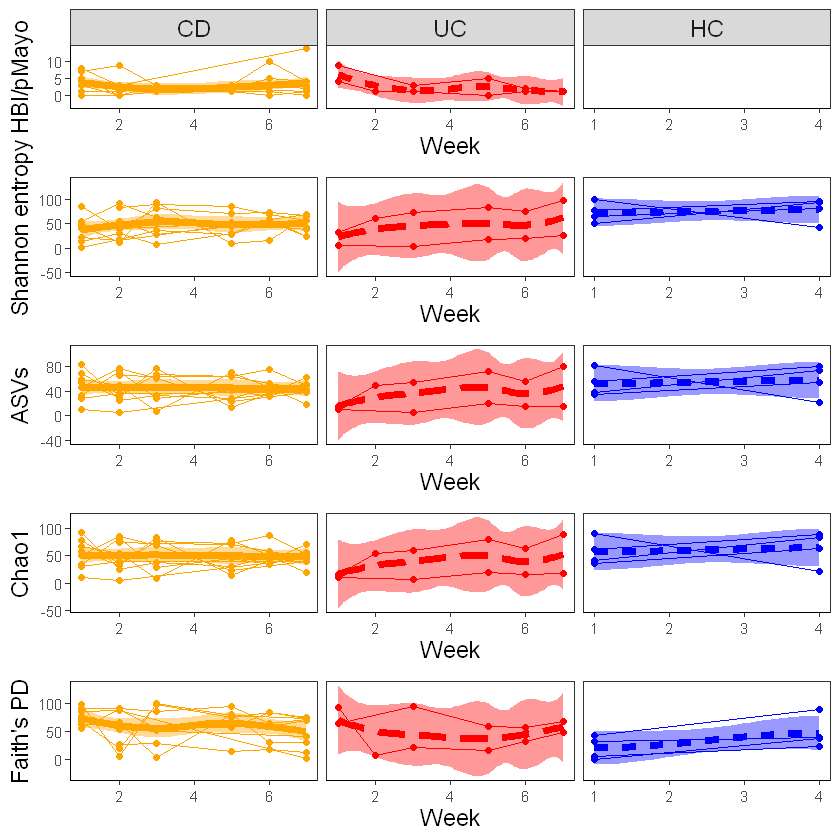

In [5]:
# plot disease severity scores
plt_score_st <- ggplot(data=metadata_stool)+
  geom_point(mapping = aes(x = Week_num, y = HBI_pMayo, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = HBI_pMayo, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = HBI_pMayo, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC'), scales = "free")+
  labs(x="Week", y="HBI/pMayo")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none",
        axis.line = element_line(colour = "black"),
        axis.title = element_text(size = 14),
        strip.text.x = element_text(size = 14))+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))


# plot Shannon diversity in time
plt_shannon_st <- ggplot(data=metadata_stool)+
  geom_point(mapping = aes(x = Week_num, y = shannon_entropy, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = shannon_entropy, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = shannon_entropy, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="Shannon entropy")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none",
        axis.line = element_line(colour = "black"),
        axis.title = element_text(size = 14),
        strip.text.x = element_blank())+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# plot ASVs in time
plt_asv_st <- ggplot(data=metadata_stool)+
  geom_point(mapping = aes(x = Week_num, y = observed_features, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = observed_features, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = observed_features, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="ASVs")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none", 
        axis.line = element_line(colour = "black"), 
        axis.title = element_text(size = 14),
        strip.text.x = element_blank())+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# plot Chao1 in time
plt_chao1_st <- ggplot(data=metadata_stool)+
  geom_point(mapping = aes(x = Week_num, y = chao1, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = chao1, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = chao1, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="Chao1")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none", 
        axis.line = element_line(colour = "black"), 
        axis.title = element_text(size = 14),
        strip.text.x = element_blank())+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# plot Faith's PD in time
plt_faith_st <- ggplot(data=metadata_stool)+
  geom_point(mapping = aes(x = Week_num, y = faith_pd, group=Patient, color=Dg))+
  geom_line(mapping = aes(x = Week_num, y = faith_pd, group=Patient, color=Dg))+
  geom_smooth(mapping = aes(x = Week_num, y = faith_pd, linetype=Dg, color=Dg, fill=Dg), size=2)+
  facet_grid(~fct_relevel(Dg,'CD','UC','HC'), scales = "free")+
  labs(x="Week", y="Faith's PD")+
  theme_bw()+
  theme(panel.grid = element_blank(), legend.position="none", 
        axis.line = element_line(colour = "black"), 
        axis.title = element_text(size = 14),
        strip.text.x = element_blank())+
  scale_color_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))+
  scale_fill_manual(values = c("CD"="orange", "UC"="red", "HC"="blue"))

# combine plots to one figure
options(warn=-1)
stool_timelines <- plot_grid(plt_score_st, plt_shannon_st, plt_asv_st, plt_chao1_st, plt_faith_st, cols=1, align = "v")
stool_timelines
options(warn=0)

# save figure
#png(file = "/Users/dagmarschierova/MEGA/MBÚ/USTEK/Figures/USTEK_stool_alpha_timelines.png", bg = "transparent", res=300, width=5000, height=3000)
png(file = "C:\\Users\\Dasa\\Documents\\MEGA\\MBÚ\\USTEK\\Figures\\USTEK_stool_alpha_timelines.png", bg = "transparent", res=300, width=4500, height=3000)
plot(stool_timelines)
dev.off()